In [1]:
import sys
sys.path.append('../')
import numpy as np
from backend.logic import Game
from qiskit.visualization import plot_histogram

## Prisoners Dilemma

In [ ]:
prisoner_game_quantum = Game(game_name='prisoner', num_players=2, protocol="EWL")
prisoner_game_quantum.display_payoffs()

In [ ]:
P1_strategy = 'X'
P2_strategy = 'S'
combined_strategies = [P1_strategy, P2_strategy]

In [ ]:
outcomes, results = prisoner_game_quantum.play_game(combined_strategies, n_times=1)
prisoner_game_quantum.show_results()

In [ ]:
outcomes_sim, results_sim = prisoner_game_quantum.play_game(combined_strategies, n_times = 100)
prisoner_game_quantum.show_results()

In [ ]:
prisoner_game_quantum._quantum_game.circ.draw(output='mpl')

In [ ]:
plot_histogram(outcomes_sim)

## Esquina

In [ ]:
my_payoff_table = {'00': "0,0", 
                   '01': "10,5",
                   '10': "5,10",
                   '11': "5,5"} 
esquina = Game('custom', num_players=2, protocol="EWL", payoff_table=my_payoff_table)
esquina.display_payoffs()

In [ ]:
P1_strategy = 'X'
P2_strategy = 'S'
combined_strategies = [P1_strategy, P2_strategy]
outcomes, results = esquina.play_game(combined_strategies, n_times=100)
esquina.show_results()

In [ ]:
esquina._quantum_game.circ.draw(output='mpl')

In [ ]:
plot_histogram(outcomes)

## Minority Game

In [2]:
minority_game = Game('minority', num_players = 4, protocol="EWL")
minority_game.set_protocol("EWL", backend = 'simulator')
minority_game.display_payoffs()

Game: minority
Payoffs: 


,outcome,payoffs
0,0000,"(0.0, 0.0, 0.0, 0.0)"
1,0001,"(0.0, 0.0, 0.0, 1.0)"
2,0010,"(0.0, 0.0, 1.0, 0.0)"
3,0011,"(0.0, 0.0, 0.0, 0.0)"
4,0100,"(0.0, 1.0, 0.0, 0.0)"
5,0101,"(0.0, 0.0, 0.0, 0.0)"
6,0110,"(0.0, 0.0, 0.0, 0.0)"
7,0111,"(1.0, 0.0, 0.0, 0.0)"
8,1000,"(1.0, 0.0, 0.0, 0.0)"
9,1001,"(0.0, 0.0, 0.0, 0.0)"


In [3]:
P1_strategy = ['Rz(-3*pi/8)', 'Ry(pi/2)', 'Rz(pi/2)']
P2_strategy = ['Rz(-3*pi/8)', 'Ry(pi/2)', 'Rz(pi/2)']
P3_strategy = ['Rz(-3*pi/8)', 'Ry(pi/2)', 'Rz(pi/2)']
P4_strategy = ['Rz(-3*pi/8)', 'Ry(pi/2)', 'Rz(pi/2)']
combined_strategies = [P1_strategy, P2_strategy, P3_strategy, P4_strategy]

In [4]:
outcomes, results = minority_game.play_game(combined_strategies, n_times=1000)

Executing circuit ....
Circuit running ...
Circuit finished running, getting counts ...


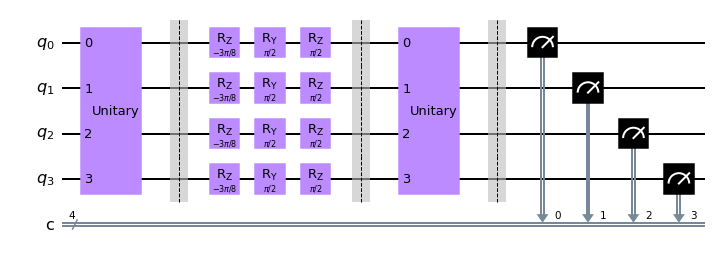

In [5]:
minority_game._quantum_game.draw_circuit()

In [6]:
minority_game.show_results()

,Outcome,Payoffs,Winners,num_times
0,1000,"[1.0, 0.0, 0.0, 0.0]",Player 1,121
1,0100,"[0.0, 1.0, 0.0, 0.0]",Player 2,113
2,0010,"[0.0, 0.0, 1.0, 0.0]",Player 3,131
3,1110,"[0.0, 0.0, 0.0, 1.0]",Player 4,137
4,0001,"[0.0, 0.0, 0.0, 1.0]",Player 4,121
5,1101,"[0.0, 0.0, 1.0, 0.0]",Player 3,125
6,1011,"[0.0, 1.0, 0.0, 0.0]",Player 2,130
7,0111,"[1.0, 0.0, 0.0, 0.0]",Player 1,122


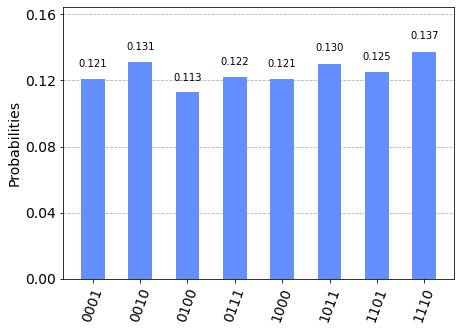

In [7]:
plot_histogram(outcomes)